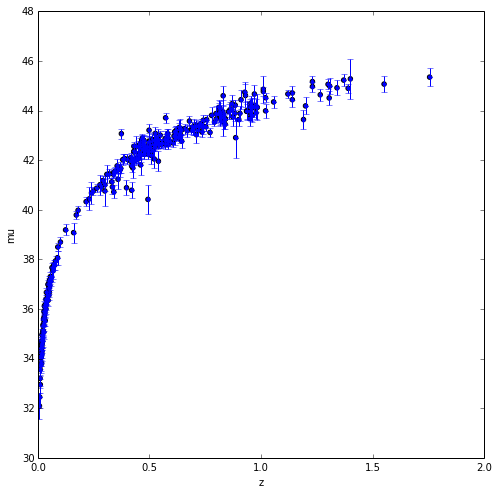

In [74]:
import numpy as np
import matplotlib.pyplot as plt

#2a

z, mu, sigma = np.loadtxt("SNdata.txt", skiprows = 1, usecols = (1, 2, 3), unpack = True)

yerror = sigma

fig = plt.figure(1, figsize=(8,8))
plt.errorbar(z, mu, yerr = yerror, fmt = ".")

ax1 = fig.add_subplot(111)
ax1.scatter(z, mu)
ax1.set_xlim(0, 2)
ax1.set_xlabel("z")
ax1.set_ylabel("mu")

plt.show()

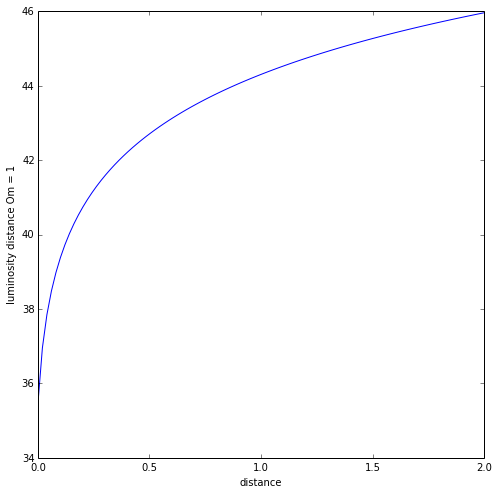

In [75]:
#2b
'''
c = 3.0E8 #m
h = 0.7
H0 = h * 100 #km/s/Mpc
Dh = c/H0

Om = 1.0
Ol = 1.0 - Om

def dcdz(z):
    dcdz0 = Dh * (1/(((1 + z)**3)*Om + ((1 + z)**2)*(1 - Om - Ol) + Ol))
    return dcdz0

def mu(r):

    #initialize D
    Dc0 = 0
    Dc = Dc0
    Dl0 = 0
    Dl = Dl0
    mu = 0
    
    Dc_val1 = list()
    Dl_val1 = list()
    mu1 = list() 

    dcdz0 = dcdz(r)
    
    #calculate Dl
    for i in r:
        Dc = Dc + dcdz(i) * (2/100.0)
        Dl = Dc * (1 + i)
        Dlstar = Dl * h
        mu = 25. - 5*np.log10(h) + 5*np.log10(Dlstar)
        Dl_val1.append(Dl)
        Dc_val1.append(Dc)
        mu1.append(mu)
    return mu1
'''
c = 3.0E8 #m

def dcdz(Om, h, z):

    H0 = h * 100 #km/s/Mpc
    Dh = c/H0

    Ol = 1.0 - Om
    dcdz0 = Dh * np.sqrt(1/(((1 + z)**3)*Om + Ol))
    return dcdz0

def mu(Om, h, r):

    H0 = h * 100 #km/s/Mpc
    Dh = c/H0

    Ol = 1.0 - Om

    #initialize D
    Dc0 = 0
    Dc = Dc0
    Dl0 = 0
    Dl = Dl0
    mu = 0
    
    Dc_val1 = list()
    Dl_val1 = list()
    mu1 = list() 

    dcdz0 = dcdz(Om, h, r)
    
    #calculate Dl
    for i in r:
        Dc = Dc + dcdz(Om, h, i) * (2/100.0)
        Dl = Dc * (1 + i)
        Dlstar = Dl
        mu = 10. - 5*np.log10(h) + 5*np.log10(Dlstar)
        Dl_val1.append(Dl)
        Dc_val1.append(Dc)
        mu1.append(mu)
    return mu1

#create stepsize
r = np.linspace(0, 2, 100)
    
mu1 = mu(1, 0.7, r)

fig = plt.figure(1, figsize=(8,8))


ax1 = fig.add_subplot(111)
ax1.plot(r, mu1)
ax1.set_xlabel("distance")
ax1.set_ylabel("luminosity distance Om = 1")

plt.show()

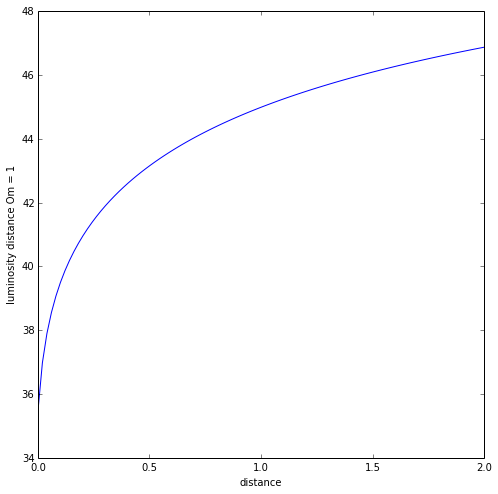

In [76]:
mu2 = mu(0.23, 0.7, r)  

fig = plt.figure(1, figsize=(8,8))

ax1 = fig.add_subplot(111)
ax1.plot(r, mu2)
ax1.set_xlabel("distance")
ax1.set_ylabel("luminosity distance Om = 1")

plt.show()

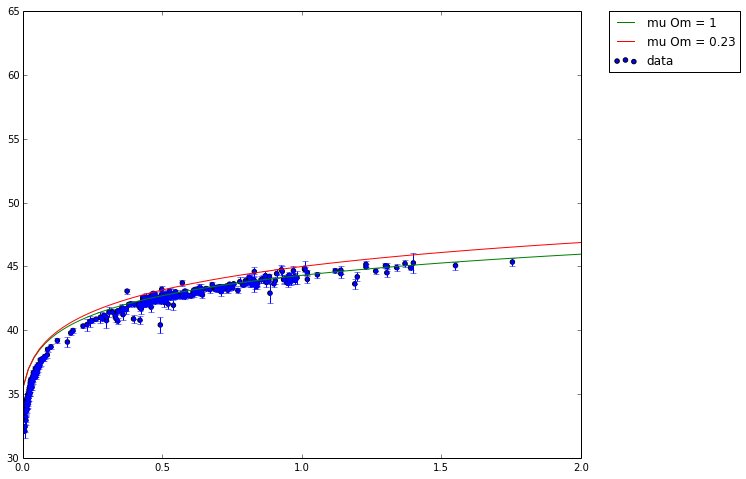

In [77]:
r = np.linspace(0, 2.0, 100)
z, mu, sigma = np.loadtxt("SNdata.txt", skiprows = 1, usecols = (1, 2, 3), unpack = True)
fig = plt.figure(1, figsize = (10, 8))
plt.scatter(z, mu, label = "data")
plt.errorbar(z, mu, yerr = yerror, fmt = ".")
plt.plot(r,mu1, label = "mu Om = 1") 
plt.plot(r,mu2, label = "mu Om = 0.23")
plt.xlim(0, 2)
plt.ylim(30, 65)
#create legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [78]:
#2b written answer
"""There is definitely a difference in the two graphs. The luminosity distance is much higher than the
data given. Though the shape is the same, the magnitudes are different."""

'There is definitely a difference in the two graphs. The luminosity distance is much higher than the\ndata given. Though the shape is the same, the magnitudes are different.'

In [79]:
#3a
'''
I would get the best fit model by using fmin in scipy to optimize the function, and return best fit parameters
'''


'\nI would get the best fit model by using fmin in scipy to optimize the function, and return best fit parameters\n'

In [80]:
#3b
#need mu function, error function
#error function

z, mu, sigma = np.loadtxt("SNdata.txt", skiprows = 1, usecols = (1, 2, 3), unpack = True)

'''#z.sort
def mutheory(Om, h, r):
    H0 = h * 100 #km/s/Mpc
    Dh = c/H0

    Ol = 1.0 - Om

    #initialize D
    Dc0 = 0
    Dc = Dc0
    Dl0 = 0
    Dl = Dl0
    mu = 0
    
    Dc_val1 = list()
    Dl_val1 = list()
    mu1 = list() 
    
    #calculate Dl
    for i in r:
        Dc = Dc + dcdz(Om, h, i) * ((max(r))/(len(r)))
        Dlstar = Dc * (1 + i)
        mu = 10. - 5*np.log10(h) + 5*np.log10(Dlstar)
        Dl_val1.append(Dl)
        Dc_val1.append(Dc)
        mu1.append(mu)
    return mu1
'''  

def chi_2(Om, h, z, sigma, mu):
 
    chi2 = 0
 
    for i in z:
        mu0 = mu(Om, h, i)
        chi2 = chi2 + ((mu0- mu[i])**2)/(sigma[i]**2)
        print chi2
        
    return chi2


In [81]:
chi20 = chi_2(0.23, 0.7, z, sigma, mu)
print chi20



TypeError: 'numpy.ndarray' object is not callable

In [82]:

Om, h = parameters
params0 = [0.2, 0.7]

from scipy.optimize import fmin
r = (0, 2, 100)
chi2opt = fmin(chi_2(parameters, z, sigma, mu), params0, args = (z, sigma, mu))
print "parameters =",  chi2opt

#3c plotting
zz = np.linspace(0, 2, 100)
plt.plot(mu(Om, h, zz))
plt.plot(mu(chi2opt, zz))
plt.show() 

'''
#3a
from scipy.optimize import fmin
from pylab import *
from numpy import *
from numpy.random import normal
from scipy.optimize import fmin

# parametric function, x is the independent variable
# and c are the parameters.
# it's a polynomial of degree 2
fp = lambda c, x: c[0]+c[1]*x+c[2]*x*x
real_p = rand(3)

# error function to minimize
e = lambda p, x, y: (abs((fp(p,x)-y))).sum()

# generating data with noise
n = 30
x = linspace(0,1,n)
y = fp(real_p,x) + normal(0,0.05,n)

# fitting the data with fmin
p0 = rand(3) # initial parameter value
p = fmin(e, p0, args=(x,y))

print 'estimater parameters: ', p
print 'real parameters: ', real_p

xx = linspace(0,1,n*3)
plot(x,y,'bo', xx,fp(real_p,xx),'g', xx, fp(p,xx),'r')

show()
'''

NameError: name 'parameters' is not defined